<a href="https://colab.research.google.com/github/sambhav-antriksh/AIML-Project/blob/main/JAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# JAX Tutorial
# We need to learn the JAX in our own way
So what is  JAX ?

JAX provides a unified Numpy like interface to computations that can run on CPU,GPU and TPU, in local as well as in distributed settings.
It is numpy on steroids. It has two main superpowers
* Automatic Differentiation
* Accelerator Support
It is basically the combination of Numpy like syntax + PyTorch-like autodifferentiation+ TensorFLow/XLA-like accelerators.

# Why JAX if Numpy and PyTorch Exist?
* Numpy do not have GPU support and no autodifferentiation
* JAX lets us write NEW ML Architecture ( not just use prebuilt one )
* Works seamlessly on CPU/GPU/TPU
* Core for research in new neural architecture (e.g. FNO,PINNS,diffusion models etc )
It is like a research lab where one can ivent new algorithms, train them fast, and run them on clusters.

In [1]:
import jax.numpy as jnp
from jax import grad


In [2]:
def f(x):
  return jnp.sin(x) * jnp.exp(-x)



In [3]:
dfdx=grad(f)
print(dfdx(2.0))

-0.17937937


# What is Equinox?
* JAX is the core numerical + autodifferentiation +CPU/GPU/TPU library
* Equinox is a lightweight neural network library built on top of JAX
* Equinox helps in building models (NN layers,modules ) easily, similar to PyTorch's torch.nn.Module


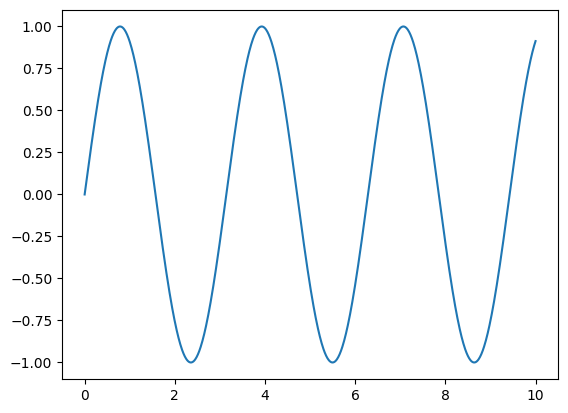

In [7]:
import matplotlib.pyplot as plt
x_jnp=jnp.linspace(0,10,1000)
y_jnp=2*jnp.sin(x_jnp)*jnp.cos(x_jnp)
plt.plot(x_jnp,y_jnp)

In [9]:
# Check the data type that we are using
import numpy as np
import jax.numpy as jnp
x_np=np.linspace(0,10,1000)
x_jnp=jnp.linspace(0,10,1000)
print(type(x_np))
print(type(x_jnp))

<class 'numpy.ndarray'>
<class 'jaxlib.xla_extension.ArrayImpl'>


In [10]:
# JAX array are immutable
x=jnp.arange(10)

In [11]:
x

Array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

In [12]:
x[0]=10

TypeError: JAX arrays are immutable and do not support in-place item assignment. Instead of x[idx] = y, use x = x.at[idx].set(y) or another .at[] method: https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html

In [13]:
x.at[0].set(10)  # this is the correct way to change the entry of the JAX array

Array([10,  1,  2,  3,  4,  5,  6,  7,  8,  9], dtype=int32)

# JAX Arrays
* Create Arrays using JAX API functions
* JAX array objects have a devices attribute that indicates where the array is stored
* JAX arrays can be sharded across multiple devices for parallel computation

In [16]:
import jax
import jax.numpy as jnp
x=jnp.arange(5)
isinstance(x,jax.Array)


True

In [24]:
l=[1,2,3]
arr=jnp.array(l)
print(len(arr))

3


In [25]:
jnp.append(arr,5)

Array([1, 2, 3, 5], dtype=int32)

In [19]:
type(arr)

jaxlib.xla_extension.ArrayImpl

In [27]:
# The device objet in the JAX array lets us inspect where the contents of the Array are stored.
# In the simplest case this will be single CPU device
x.devices()

{CpuDevice(id=0)}

In [28]:
x.sharding

SingleDeviceSharding(device=CpuDevice(id=0), memory_kind=unpinned_host)

# Just-In-Time Compilation JIT with jax.jit
This thing makes the JAX fast .
* By default JAX executes operations one at a time, in sequence
* Using a just-in-time (JIT) compilation decorator, sequences of operations can be optimized together and run at once.
* Not all JAX codes can be JIT compiled, as it requires array shapes to be static & known at compile time. If we have sequence of operations, we can use jax.jit function to compile this sequence of operations together using XLA compiler.

In [29]:
from jax import jit


In [30]:
def compute(x):
  y=jnp.sin(x)
  z=jnp.exp(y)
  return jnp.sum(z)

In [31]:
# Normal (step by step )
print(compute(x))

7.423082


In [32]:
# Optimized (JIT)
fast_compute=jit(compute)
print(fast_compute(x))

7.423082


In [33]:
import jax.numpy as jnp
def norm(x):
    x=x-x.mean(0)
    return x/x.std(0)

In [35]:
from jax import jit
norm_compiled=jit(norm)
print(norm_compiled(jnp.array([[1,2,3],[4,5,6]])))

[[-1. -1. -1.]
 [ 1.  1.  1.]]


In [37]:
np.random.seed(1701)
x=jnp.array(np.random.rand(10000,10))
np.allclose(norm(x),norm_compiled(x),atol=1e-6)   # to check that the output of
# both the normal and the jit compiled are very close to each other

True

In [38]:
%timeit norm(x).block_until_ready()

630 µs ± 81.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [39]:
%timeit norm_compiled(x).block_until_ready()

469 µs ± 12.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# JIT cannot compile code that returns arrays with shapes that depend on input values.

In [44]:
# All things can't be done using JIT
def get_negatives(x):
  return x[x<0]
x=jnp.array(np.random.randn(10))
get_negatives(x)
# Let us try to execute the above in the JIT mode
# jit(get_negatives)(x)

Array([-0.01968225, -1.0379286 , -1.9828033 , -0.1554043 , -0.14639181],      dtype=float32)

# Taking derivatives with jax.grad
* JAX provides automatic differentiation via the jax.grad function
* The jax.grad and jax.jit transformation compose and can be mixed arbitrary.
In addition to transforming functions via JIT compilation, JAX also provides other transformations. Once such transformation is jax.grad, which performs automatic differentiation (autodiff)

In [45]:
x_small=jnp.arange(3.)
x_small

Array([0., 1., 2.], dtype=float32)

In [46]:
from jax import grad
def sum_logistic(x):
  return jnp.sum(1/(1+jnp.exp(-x)))

In [47]:
derivative_fn=grad(sum_logistic)
print(derivative_fn(x_small))

[0.25       0.19661197 0.10499357]


In [48]:
# let us verify that this is indeed a correct thing with the finite differnce approach method
def first_finite_difference(f,x,eps=1e-3):
  return jnp.array([(f(x+eps*v)-f(x-eps*v))/(2*eps) for v in jnp.eye(len(x))])

print(first_finite_difference(sum_logistic,x_small))

[0.24998187 0.1964569  0.10502338]


In [58]:
# Beyond scalar valued functions, the jax.jacobian transformation can be used to compute the full jacobian matrix for vector valued functions
print(grad(jit(grad(jit(grad(sum_logistic)))))(0.2))

-0.12007015


# JAX Jacobian implementation

In [59]:
from jax import jacobian
print(jacobian(jnp.exp)(x_small))

[[1.        0.        0.       ]
 [0.        2.7182817 0.       ]
 [0.        0.        7.389056 ]]


In [61]:
# Using forward and reverse both to compute a full Hessian matrices
from jax import jacfwd,jacrev
def hessian(fun):
  return jit(jacfwd(jacrev(fun)))
def f(x):
    return jnp.sum(jnp.exp(x))  # Scalar output

print(hessian(f)(x_small))


[[1.        0.        0.       ]
 [0.        2.7182817 0.       ]
 [0.        0.        7.389056 ]]


# Auto Vectorization with jax.vmap
* We can write the code as if it is scalar and vmap will handle batching
* vmap creates a vectorized version
* It supports the paralle computation on GPU/TPU

In [62]:
# Non vectorized form
def f_scalar(x):
    return x **2
results=[f_scalar(xi) for xi in [1,2,3,4]]

In [63]:
results

[1, 4, 9, 16]

In [64]:
#Vectorized form
def f_vectorized(x):
  return x **2

f_vectorized(jnp.array([1,2,3,4]))

Array([ 1,  4,  9, 16], dtype=int32)

In [69]:
from jax import vmap
def square(x):
  return x**2
vmap_square=vmap(square)
result=vmap_square(jnp.array([1,2,3,4]))
print(result)

[ 1  4  9 16]


In [72]:
from jax import grad

def loss_fn(x):
  return jnp.sum(x**2)

grad_fn=grad(loss_fn)

# Gradient at multiple inputs

xs=jnp.array([[1.0,2.0],[3.0,4.0]])

batched_grads=vmap(grad_fn)(xs) # look how the scalar function has become the vector valued function

In [73]:
batched_grads

Array([[2., 4.],
       [6., 8.]], dtype=float32)

In [74]:
from jax import random

key=random.key(1701)

key1,key2= random.split(key)

mat=random.normal(key1, (150,100))   # like defining 150 neurons with 100 weights each

batched_x= random.normal(key2, (10,100))   #like 10 vectors with size 100 each

def apply_matrix(x):
  return jnp.dot(mat,x)


In [75]:
def naively_batched_apply_matrix(v_batched):
  return jnp.stack([apply_matrix(v) for v in v_batched])    #this is not vectorization

print('Naively batched')
%timeit naively_batched_apply_matrix(batched_x).block_until_ready()

Naively batched
1.84 ms ± 542 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [76]:
import numpy as np

@jit
def batched_apply_matrix(batched_x):
  return jnp.dot(batched_x, mat.T)

np.testing.assert_allclose(naively_batched_apply_matrix(batched_x),
                           batched_apply_matrix(batched_x),
                           atol=1e-5)

print('Manually batched')
%timeit batched_apply_matrix(batched_x).block_until_ready()

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=1e-05

Mismatched elements: 1 / 1500 (0.0667%)
Max absolute difference among violations: 1.335144e-05
Max relative difference among violations: 4.9422033e-07
 ACTUAL: array([[-12.314034, -11.859841,  18.329819, ...,  -3.89819 ,   2.652007,
          6.376201],
       [ -0.743291,   3.60522 ,  -5.853775, ...,  -7.183312, -23.047962,...
 DESIRED: array([[-12.314034, -11.859841,  18.32982 , ...,  -3.898189,   2.652007,
          6.3762  ],
       [ -0.743291,   3.605222,  -5.853776, ...,  -7.183314, -23.047962,...

In [78]:
from jax import vmap
@jit
def vmap_batched_apply_matrix(x):
  return vmap(apply_matrix)(batched_x)

print('Auto-vectorized with vmap')
np.testing.assert_allclose(batched_apply_matrix(batched_x),
                               vmap_batched_apply_matrix(batched_x),atol=1E-4,rtol = 1E-4)

print('Auto-vectorized with vmap')
%timeit vmap_batched_apply_matrix(batched_x).block_until_ready()

Auto-vectorized with vmap
Auto-vectorized with vmap
The slowest run took 5.75 times longer than the fastest. This could mean that an intermediate result is being cached.
15.3 µs ± 13.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# JAX Pseudorandom numbers

* JAX uses a different model for pseudo random number generation than NumPy
* JAX random functions consume a random key that must be split to generate new independent keys
* JAX's random key model is thread-safe and avoids issues with global state.

In [79]:
from jax import random

key=random.key(43)
print(key)

Array((), dtype=key<fry>) overlaying:
[ 0 43]


In [80]:
print(random.normal(key))

0.07520543


In [81]:
print(random.normal(key))

0.07520543


In [86]:
from jax import random
key=random.key(43)
for i in range(3):
  new_key,subkey= random.split(key)
  del key
  val= random.normal(subkey)
  del subkey

  print(f'draw{i}:{val}')

draw0:-1.9133632183074951


NameError: name 'key' is not defined